In [4]:
import bilby
import matplotlib.pyplot as plt
import numpy as np
from bilby.core.utils import random
from bilby.core.prior import PriorDict, DeltaFunction

from scipy.signal import get_window
from scipy.fft import fft, fftfreq

random.seed(123)

In [ ]:
#Exercise 1: Sinusoid 

# Setup
outdir_ex1 = "outdir_ex1"
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir_ex1)
label_ex1 = "sinusoidal_FFT"

sampling_frequency_ex1 = 256
time_duration_ex1 = 3

time_ex1 = np.arange(0, time_duration_ex1, 1/sampling_frequency_ex1) 
freq_ex1 = fftfreq(len(time_ex1), 1/sampling_frequency_ex1)

injection_parameters_ex1 = dict(
    A=1e-22,  
    f=150.0,  
    phi=0.0,
    geocent_time=0,
    ra=1.375,
    dec=-1.2108,
    psi=2.659
)


def model_ex1(time, A, f, phi, **kwargs):
        N = len(time)
        sinusoid = (A*np.sin(2*np.pi*f*time) + phi)
        window = get_window('hann', N)
        return dict (plus=sinusoid*window, cross=sinusoid*window) 
        # return sinusoid*window

waveform_generator = bilby.gw.WaveformGenerator(
    duration=time_duration_ex1,
    sampling_frequency=sampling_frequency_ex1,
    time_domain_source_model=model_ex1,
    start_time=0,
)

# ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos = bilby.gw.detector.InterferometerList(["H1"])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency_ex1,
    duration=time_duration_ex1,
    start_time=0,
)
ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters_ex1, raise_error=False
)

10:01 bilby INFO    : Waveform generator instantiated: WaveformGenerator(duration=3, sampling_frequency=256, start_time=0, frequency_domain_source_model=None, time_domain_source_model=__main__.model_ex1, parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters, waveform_arguments={})
10:01 bilby INFO    : Generation of mass parameters failed with message 'mass_1'
10:01 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
10:01 bilby INFO    : Generation of source frame parameters failed with message 'luminosity_distance'
10:01 bilby INFO    : Injected signal in H1:
10:01 bilby INFO    :   optimal SNR = 15.29
10:01 bilby INFO    :   matched filter SNR = 15.99-0.05j
10:01 bilby INFO    :   A = 1e-22
10:01 bilby INFO    :   f = 150.0
10:01 bilby INFO    :   phi = 0.0
10:01 bilby INFO    :   geocent_time = 0
10:01 bilby INFO    :   ra = 1.375
10:01 bilby INFO    :   dec = -1.2108
10:01 bilby INFO    :   psi = 2.659


[{'plus': array([-2.68438295e-37+0.00000000e+00j,  5.53215996e-39-8.57195178e-38j,
          3.28737717e-37-1.53267351e-37j,  7.72787093e-39+2.23192400e-37j,
         -3.32030313e-37+6.68814437e-37j, -6.18619431e-38-1.45242756e-36j,
          1.93572070e-38+1.50014806e-36j,  3.87676414e-38-1.47339984e-36j,
          3.15238364e-37+7.68903503e-37j, -5.42433695e-38+1.28930663e-37j,
         -3.29443317e-37-2.78374443e-37j,  2.12058758e-37+1.85280103e-38j,
          1.65747612e-37+1.00989364e-37j, -2.63319999e-37+5.41140102e-38j,
          1.42020883e-38-8.07271085e-38j,  1.75483799e-37-8.01464616e-38j,
         -7.55666368e-38+1.37550355e-37j, -1.02797003e-37+5.94263290e-38j,
          3.40895903e-38-2.42752223e-37j,  9.63513112e-38+1.67842354e-37j,
         -3.99007410e-38+4.92017181e-38j, -1.17571829e-37-1.24989045e-37j,
          9.44235312e-38-2.08226283e-38j,  7.76719518e-38+8.03969296e-38j,
         -1.34491858e-37+3.35804715e-38j,  2.19069472e-39-7.84275222e-38j,
          1.37982

In [6]:
# priors = bilby.gw.prior.BBHPriorDict(injection_parameters_ex1.copy())

priors = dict()
priors['A'] = bilby.core.prior.Uniform(0.5e-22, 1.5e-22, 'A')
priors['f'] = bilby.core.prior.Uniform(140.0, 160.0, 'f')
priors['phi'] = bilby.core.prior.Uniform(-0.5, 0.5, 'phi')

# Fixed parameters
priors['geocent_time'] = DeltaFunction(0.0, 'geocent_time')
priors['ra'] = DeltaFunction(1.375, 'ra')
priors['dec'] = DeltaFunction(-1.2108, 'dec')
priors['psi'] = DeltaFunction(2.659, 'psi')


likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

result = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sample="rwalk",
    npoints=50,
    injection_parameters=injection_parameters_ex1,
    outdir=outdir_ex1,
    label=label_ex1,
    boostrap=0,
    clean=True
)

10:01 bilby INFO    : Running for label 'sinusoidal_FFT', output will be saved to 'outdir_ex1'
10:01 bilby INFO    : Using lal version 7.7.0
10:01 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7.7.0;Id: ef36dfdf49181b9b376a867b55a14463783de545;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
10:01 bilby INFO    : Using lalsimulation version 6.2.0
10:01 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v6.2.0;Id: 1338470a6165fb4b4c98bccdd0efe961f05bc8e0;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
10:01 bilby INFO    : Analysis priors:
10:01 bilby INFO    : A=Uniform(minimum=5e-23, maximum=1.5e-22, name='A', latex_label='A', unit=None, boundary=None)
10:01 bilby INFO    : f=Uniform(minimum=140.0, maximum=160.0, name='f', latex_label='f', unit=None, boundary=None)
10:01 bilby INFO    : phi=Uniform(minimum=-0.5, maximum=0.5, name='phi', latex

1it [00:00, ?it/s]

10:02 bilby INFO    : Written checkpoint file outdir_ex1/sinusoidal_FFT_resume.pickle
10:02 bilby INFO    : Rejection sampling nested samples to obtain 356 posterior samples
10:02 bilby INFO    : Sampling time: 0:00:26.422109
10:02 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 


10:02 bilby WARNING : Result.save_to_file called with extension=True. This will default to json, and ignore the extension from the filename. This behaviour is deprecated and will be removed. 
10:02 bilby INFO    : Summary of results:
nsamples: 356
ln_noise_evidence: -468.155
ln_evidence: -360.138 +/-  0.825
ln_bayes_factor: 108.017 +/-  0.825



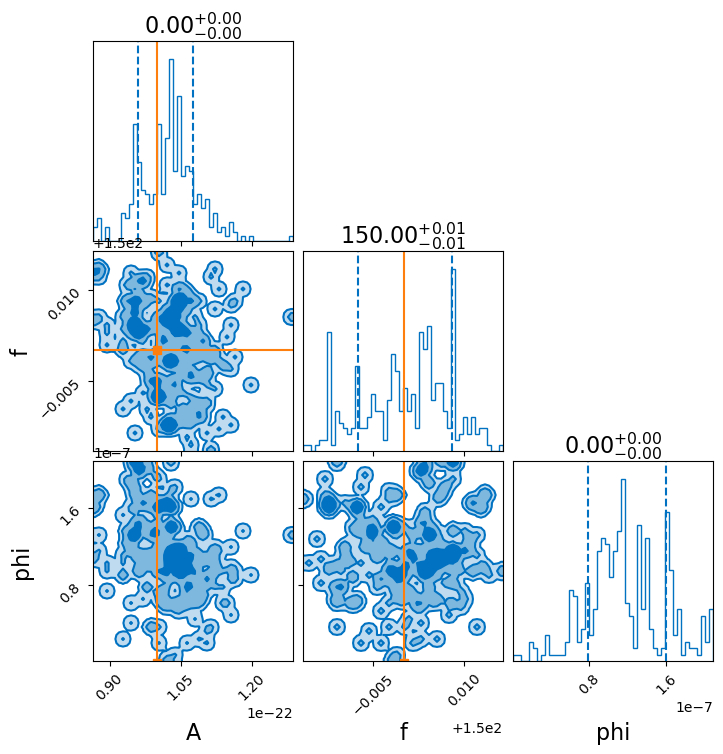

In [7]:
result.plot_corner(save=False)
plt.show()
plt.close()

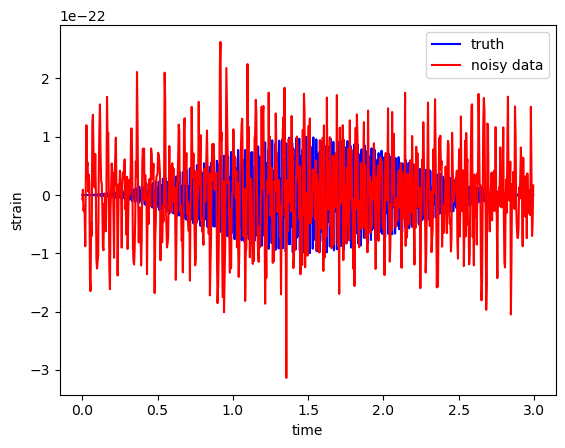

In [10]:
fig, ax = plt.subplots()

ax.plot(time_ex1, waveform_generator.time_domain_strain(injection_parameters_ex1)['plus'], "b", label="truth")
ax.plot(time_ex1, ifos[0].time_domain_strain, "r", label="noisy data")


ax.set_xlabel("time")
ax.set_ylabel("strain")
ax.legend()

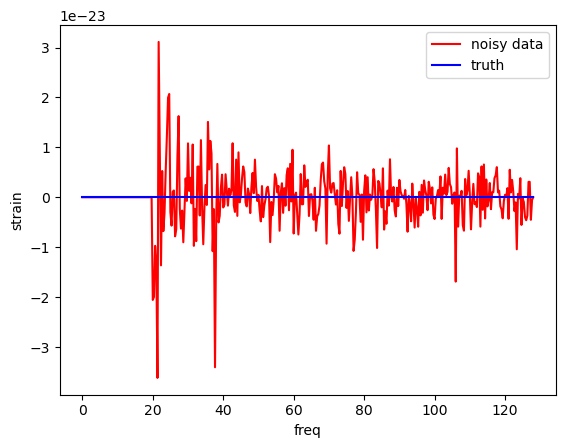

In [13]:
fig, ax = plt.subplots()

ax.plot(ifos[0].frequency_array, ifos[0].frequency_domain_strain, "r", label="noisy data")
ax.plot(ifos[0].frequency_array, waveform_generator.frequency_domain_strain(injection_parameters_ex1)['plus'], "b", label="truth")
ax.set_xlabel("freq")
ax.set_ylabel("strain")
# ax.set_yscale("log")
# ax.set_xlim(100, 120)
ax.legend()